<a href="https://colab.research.google.com/github/ThiagoGoncalves77/bibliotecaPandas/blob/main/Regress%C3%A3o%20Linear%20para%20Marketing%20-%20Modelo%20de%20predi%C3%A7%C3%A3o%20para%20estimar%20Vendas%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import files
upload = files.upload()

Saving MKT.csv to MKT (1).csv


In [82]:
import pandas as pd


In [83]:
mkt = pd.read_csv('MKT.csv')
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [84]:
mkt.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [85]:
mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [86]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks as cf

import plotly.express as px
import plotly.graph_objects as go

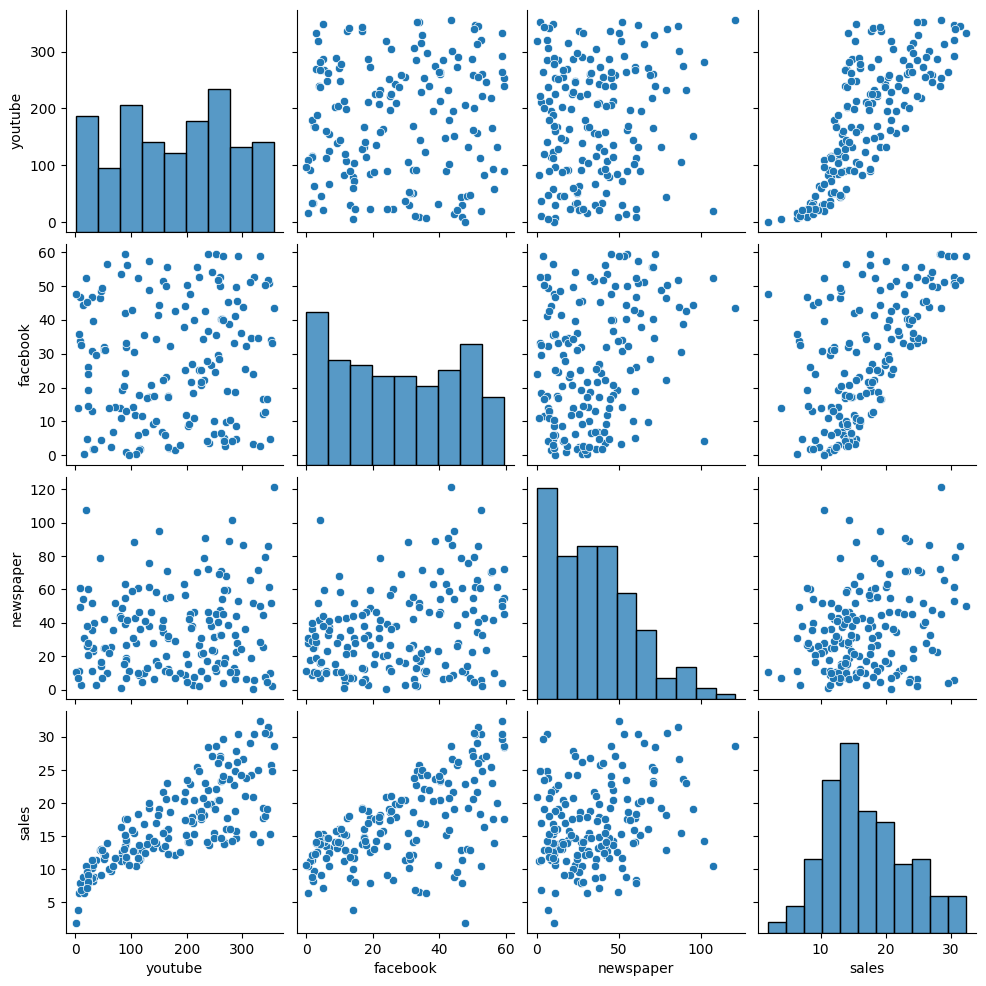

In [88]:
sns.pairplot(mkt)

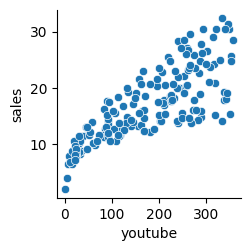

In [89]:
sns.pairplot(mkt, x_vars=['youtube'], y_vars='sales')


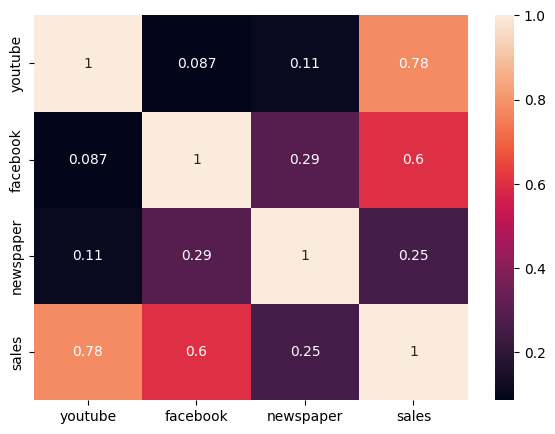

In [105]:
plt.figure(figsize=(7, 5))
sns.heatmap(mkt.corr(), annot=True)
plt.show()

<Axes: xlabel='sales', ylabel='Count'>

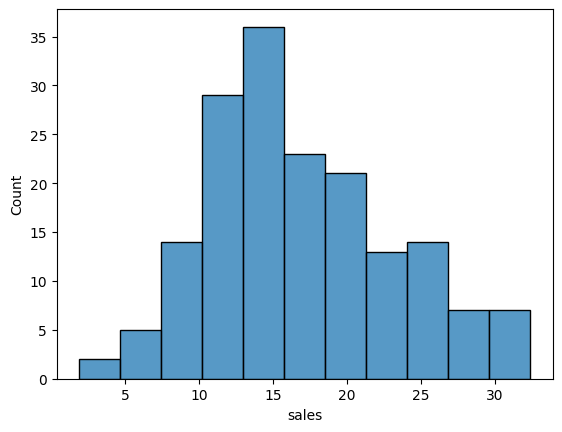

In [91]:
sns.histplot(mkt['sales'])


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar as variáveis independentes (X) e dependentes (y)
X = mkt[['youtube', 'facebook', 'newspaper']]
y = mkt['sales']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Coeficientes do modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

MSE: 5.576790234026718
R2 Score: 0.8728630857012158
Coeficientes: [ 4.54361665e+00  3.47882307e+00 -1.24622817e-03]
Intercepto: 16.82558823529412


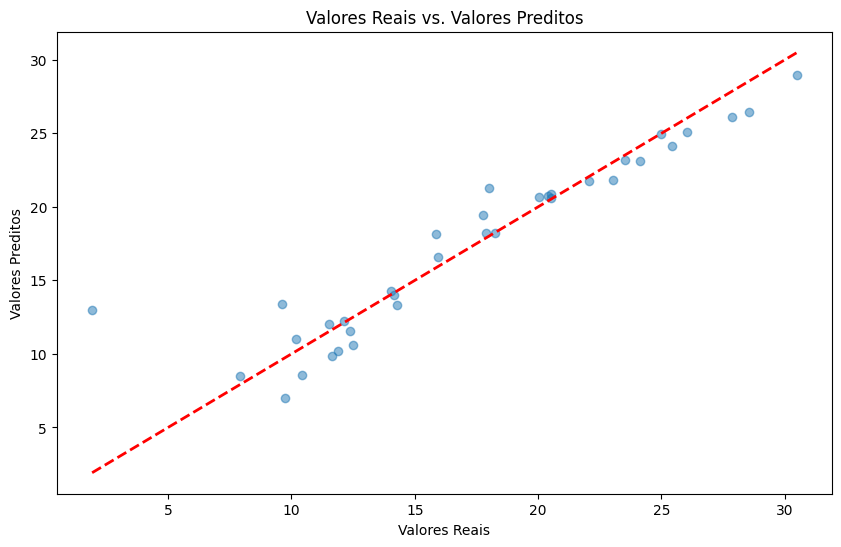

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 5.576790234026718
RMSE: 2.361522863329237
R² Score: 0.8728630857012158


In [110]:
print("Coeficientes do modelo:", model.coef_)
print("Intercepto do modelo:", model.intercept_)

Coeficientes do modelo: [ 4.54361665e+00  3.47882307e+00 -1.24622817e-03]
Intercepto do modelo: 16.82558823529412


In [114]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Regressão Ridge
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
ridge_y_pred = ridge_model.predict(X_test_scaled)
print("Ridge R² Score:", r2_score(y_test, ridge_y_pred))

# Regressão Lasso
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
lasso_y_pred = lasso_model.predict(X_test_scaled)
print("Lasso R² Score:", r2_score(y_test, lasso_y_pred))

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print("Random Forest R² Score:", r2_score(y_test, rf_y_pred))

Ridge R² Score: 0.8726061767919275
Lasso R² Score: 0.8201845418455567
Random Forest R² Score: 0.9762099922176569


In [115]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R² Scores para cada fold:", scores)
print("Média dos R² Scores:", scores.mean())

R² Scores para cada fold: [0.91818687 0.88662841 0.85350533 0.89992827 0.90323431]
Média dos R² Scores: 0.8922966369742292


In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Exemplo para Ridge
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'alpha': 1.0}


In [117]:
new_investments = np.array([[1500, 3000, 2000]])
new_investments_scaled = scaler.transform(new_investments)
predicted_sales = model.predict(new_investments_scaled)
print("Previsão de vendas para novos investimentos:", predicted_sales)

Previsão de vendas para novos investimentos: [653.33006844]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Previsão de vendas para novos investimentos: [11937.09384794]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Text(0.5, 1.0, 'Previsão de Vendas com Novos Investimentos')

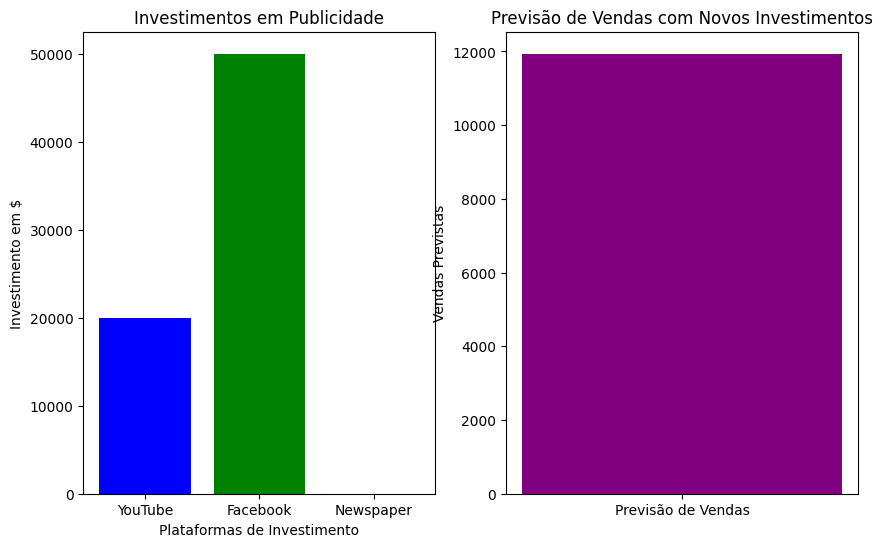

In [123]:
new_investments = np.array([[50000, 50000, 0]])

# Normalizar os novos dados
new_investments_scaled = scaler.transform(new_investments)

# Fazer a previsão
predicted_sales = model.predict(new_investments_scaled)
print("Previsão de vendas para novos investimentos:", predicted_sales)

# Plotar os resultados
# Dados para o gráfico
platforms = ['YouTube', 'Facebook', 'Newspaper']
investment_values = [20000, 50000, 0]  # Valores dos novos investimentos
predicted_sales_values = predicted_sales[0]  # Valor previsto para novos investimentos

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar investimentos
plt.subplot(1, 2, 1)
plt.bar(platforms, investment_values, color=['blue', 'green', 'red'])
plt.xlabel('Plataformas de Investimento')
plt.ylabel('Investimento em $')
plt.title('Investimentos em Publicidade')

# Plotar previsões
plt.subplot(1, 2, 2)
plt.bar(['Previsão de Vendas'], [predicted_sales_values], color='purple')
plt.ylabel('Vendas Previstas')
plt.title('Previsão de Vendas com Novos Investimentos')

In [111]:
# Coletar os coeficientes do modelo
coefficients = model.coef_

# Nome das variáveis
variable_names = ['YouTube', 'Facebook', 'Newspaper']

# Exibir os coeficientes com os nomes das variáveis
for name, coef in zip(variable_names, coefficients):
    print(f"{name}: {coef}")

YouTube: 4.543616646668393
Facebook: 3.4788230749837474
Newspaper: -0.0012462281691685284


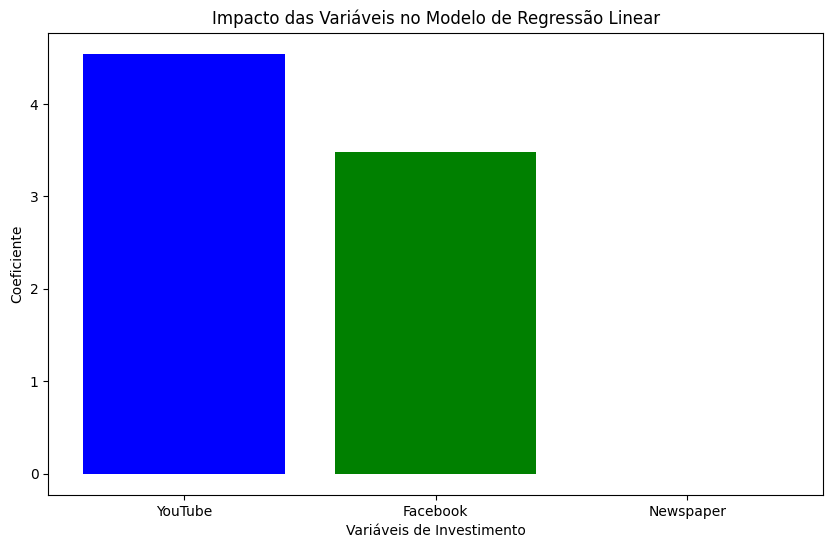

In [112]:
import matplotlib.pyplot as plt

# Coletar os coeficientes do modelo
coefficients = [4.5436, 3.4788, -0.0012]

# Nome das variáveis
variable_names = ['YouTube', 'Facebook', 'Newspaper']

# Criar um gráfico de barras para os coeficientes
plt.figure(figsize=(10, 6))
plt.bar(variable_names, coefficients, color=['blue', 'green', 'red'])
plt.xlabel('Variáveis de Investimento')
plt.ylabel('Coeficiente')
plt.title('Impacto das Variáveis no Modelo de Regressão Linear')
plt.show()